# TFG aplicacion caso práctico.

# Campaña de marketing de un banco portugués

## Librerias 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_distances, manhattan_distances


In [4]:
# Abrimos el conjunto de datos que tiene el 10% del total (aleatorio)
df= pd.read_csv('bank-additional/bank-additional.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [6]:
# Contar los duplicados en el DataFrame
duplicates_count = df.duplicated().sum()

# Imprimir el resultado
print("Cantidad de duplicados:", duplicates_count)


Cantidad de duplicados: 0


## Analisis de valores perdidos (missings)

A primera vista, vemos que no hay valores Na en nuestro dataset. Sin embargo nos damos cuenta que existe la categoria 'unknown' para algunas variables. Sustituimos 'Unknown' por Na y hacemos el análisis. 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df = df.replace({"unknown": np.nan})

In [9]:
num_missings = df.isnull().sum()
num_missings

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64

In [10]:
num_missings.sum()

1230

In [11]:
df.shape

(4119, 21)

In [12]:
df = df.dropna()
df.shape

(3090, 21)

# Analisis descriptivo

In [13]:
descripcion = df.describe()
descripcion


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000,3090.000000
mean,39.184142,259.244984,2.509385,953.350809,0.208091,-0.046796,93.532223,-40.618608,3.481706,5161.138706
std,10.184002,263.960200,2.598168,208.030041,0.560141,1.596276,0.585886,4.746448,1.770016,76.482157
min,20.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,31.000000,104.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,46.000000,315.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Visualizacion variables categoricas

In [14]:
df.rename(columns={'y': 'subscription'}, inplace=True)

In [15]:
def plot_categorical_histogram(data, column):
    plt.figure(figsize=(8, 4))
    
    # Ordenar las categorías por frecuencia
    ordered_categories = data[column].value_counts().index
    
    sns.countplot(data=data, x=column, order=ordered_categories)
    plt.title('Histograma de {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    
    # Ajustar las etiquetas del eje x en posición vertical
    plt.xticks(rotation=90)
    
    plt.show()


In [ ]:
vbles_categoricas = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome' ,'subscription']
for cat in vbles_categoricas:
    plot_categorical_histogram(df, cat)

## Transformacion de variables 

In [18]:
# quitamos la variable numero de empleado
df = df.drop('nr.employed', axis = 1)

In [19]:
# cambiar la variable month a estaciones

seasons_dict = {'mar': 'Spring', 'apr': 'Spring',
                'may': 'Spring', 'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer',
                'sep': 'Autumn', 'oct': 'Autumn', 'nov': 'Autumn', 'dec': 'Winter'}

df['season'] = df['month'].map(seasons_dict)


In [20]:
df['poutcome'].value_counts()

nonexistent    2602
failure         360
success         128
Name: poutcome, dtype: int64

In [22]:
# Lista de nombres de las columnas categóricas que deseas codificar
categorical_columns = ['job', 'marital', 'education','default','housing', 'loan', 'contact', 'month', 'poutcome', 'subscription','day_of_week', 'season']

# Crear una instancia del LabelEncoder
encoder = LabelEncoder()

# Iterar sobre cada columna categórica y aplicar el LabelEncoder
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])



In [23]:
# tirar algunas variables 
df= df.drop('month', axis=1)

# Matriz de similitud

Calculamos la matriz de similitud con la distancia euclidea:

In [24]:
df_encoded = df

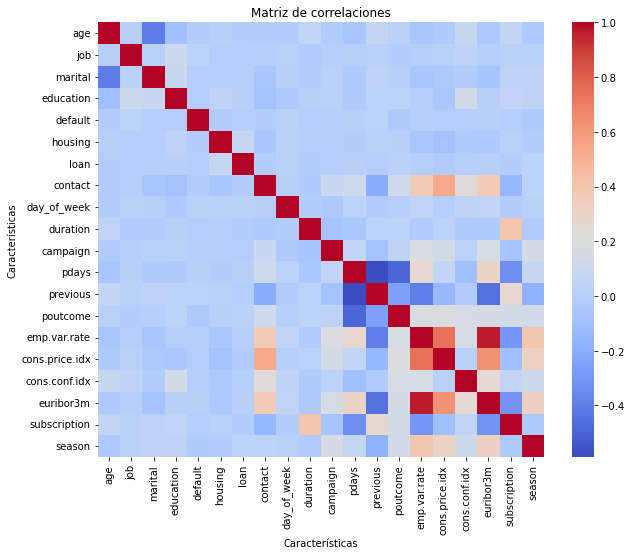

In [25]:
# Calcular la matriz de correlaciones
correlation_matrix = df_encoded.corr()

# Generar el mapa de calor
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=ax)
ax.set(title='Matriz de correlaciones', xlabel='Características', ylabel='Características')
plt.show()

In [26]:
similarity_matrix = euclidean_distances(df_encoded)
similarity_matrix

array([[  0.        , 141.85981801, 260.24293724, ..., 423.07564534,
         50.94995594, 312.11777184],
       [141.85981801,   0.        , 120.06033188, ..., 282.47994478,
        183.15702231, 171.2803861 ],
       [260.24293724, 120.06033188,   0.        , ..., 163.20260062,
        302.96952397,  52.95846664],
       ...,
       [423.07564534, 282.47994478, 163.20260062, ...,   0.        ,
        465.24466697, 111.48217349],
       [ 50.94995594, 183.15702231, 302.96952397, ..., 465.24466697,
          0.        , 353.92207511],
       [312.11777184, 171.2803861 ,  52.95846664, ..., 111.48217349,
        353.92207511,   0.        ]])

# Matriz de afinidad

In [27]:
def construct_affinity_matrix(data, k):
    # Calcular la matriz de distancias
    distances = manhattan_distances(data)

    # Encontrar los k vecinos más cercanos utilizando la matriz de distancias
    nbrs = NearestNeighbors(n_neighbors=k, metric='precomputed')
    nbrs.fit(distances)
    _, indices = nbrs.kneighbors(distances)

    # Construir la matriz de afinidad
    affinity = np.zeros((len(data), len(data)))
    # i,j sosn vecinos si y solo si affinity[i, indices[i]] = 1 or affinity[indices[i], i] = 1 
    for i in range(len(data)):
        affinity[i, indices[i]] = 1
        affinity[indices[i], i] = 1

    return affinity

W = construct_affinity_matrix(df_encoded, 4)
print('Matriz de afinidad o similitud W:')
print ('---------------------------------------')
print(W)

Matriz de afinidad o similitud W:
---------------------------------------
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


# Matriz de grados

In [28]:
D = np.diag(np.sum(W, axis=1))
print('Matriz de grados de un grafo:')
print ('---------------------------------------')
print(D)

Matriz de grados de un grafo:
---------------------------------------
[[7. 0. 0. ... 0. 0. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 [0. 0. 4. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 5. 0. 0.]
 [0. 0. 0. ... 0. 4. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


# 1. Grafo Laplaciano no normalizado.

In [29]:
# Calcular la matriz Laplaciana no normalizada (L)
L = D - W
print('Matriz Laplaciana no normalizada:')
print ('---------------------------------------')
print(L) 

Matriz Laplaciana no normalizada:
---------------------------------------
[[6. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 4. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 3.]]


In [30]:
es_simetrica = np.allclose(L, L.T)

if es_simetrica:
    print("La matriz es simétrica.")
else:
    print("La matriz no es simétrica.")

La matriz es simétrica.


In [31]:
# Calular los autovectores de L

eigenvalues, eigenvectors = eigh(L, D)
U = eigenvectors

sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]

print('Matriz de autovectores puestos como columnas:')
print ('---------------------------------------')
print(U)

Matriz de autovectores puestos como columnas:
---------------------------------------
[[-0.00000000e+00  0.00000000e+00 -2.57368548e-15 ...  5.24930035e-19
  -1.89807616e-19  3.19069527e-16]
 [ 4.91564634e-16  4.86565607e-18  1.32194797e-14 ...  6.52708784e-12
   4.29894727e-12  1.67502708e-08]
 [ 9.12989402e-16  2.22548208e-17  1.47553820e-14 ...  5.28598270e-08
  -2.19751133e-07 -7.19976398e-04]
 ...
 [ 7.92535546e-16  5.74363916e-20  6.14380683e-15 ...  3.52998402e-05
  -1.91934420e-05  1.22612633e-09]
 [-8.05020113e-17  8.08287200e-18 -5.63134608e-15 ...  1.38777878e-17
  -1.34068375e-17 -1.12214925e-16]
 [ 9.31260399e-16  1.39269383e-17  1.20343542e-14 ... -4.24505612e-05
  -2.87548826e-04  2.11118893e-04]]


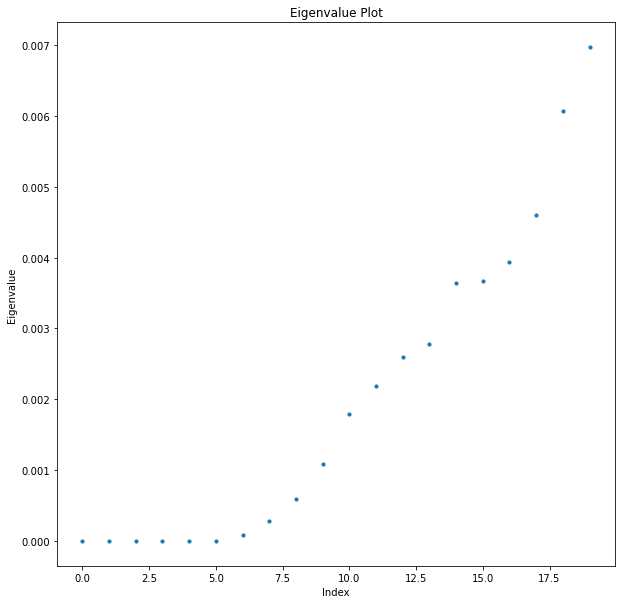

In [32]:
# Tomar los primeros 100 autovalores
w_top100 = sorted_eigenvalues[:20]

# Crear un DataFrame con los autovalores ordenados
df = pd.DataFrame(w_top100).reset_index()

# Graficar los autovalores
df.plot(
    kind='scatter',
    x='index',
    y=0,
    figsize=(10, 10),
    s=10
)

# Etiquetas de los ejes
plt.xlabel('Index')
plt.ylabel('Eigenvalue')

# Título del gráfico
plt.title('Eigenvalue Plot')

# Mostrar el gráfico
plt.show()


In [33]:
# Elegimos solo los 3 autovalores mas pequeños
indices = eigenvalues.argsort()[:5]
k_eigenvectors = eigenvectors[:, indices]
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]

print('Matriz de autovectores puestos como columnas:')
print ('---------------------------------------')
print(k_eigenvectors)

Matriz de autovectores puestos como columnas:
---------------------------------------
[[-0.00000000e+00  0.00000000e+00 -2.57368548e-15  8.27294295e-03
   2.50661191e-30]
 [ 4.91564634e-16  4.86565607e-18  1.32194797e-14  8.27294295e-03
  -1.30426892e-15]
 [ 9.12989402e-16  2.22548208e-17  1.47553820e-14  8.27294295e-03
  -3.23614284e-15]
 ...
 [ 7.92535546e-16  5.74363916e-20  6.14380683e-15  8.27294295e-03
  -2.79752717e-15]
 [-8.05020113e-17  8.08287200e-18 -5.63134608e-15  8.27294295e-03
   2.09034179e-16]
 [ 9.31260399e-16  1.39269383e-17  1.20343542e-14  8.27294295e-03
  -3.24074350e-15]]


In [34]:
# Obtener la parte real de los vectores
k_eigenvectors = np.real(k_eigenvectors)

print("Parte real de los vectores:")
print(k_eigenvectors)

Parte real de los vectores:
[[-0.00000000e+00  0.00000000e+00 -2.57368548e-15  8.27294295e-03
   2.50661191e-30]
 [ 4.91564634e-16  4.86565607e-18  1.32194797e-14  8.27294295e-03
  -1.30426892e-15]
 [ 9.12989402e-16  2.22548208e-17  1.47553820e-14  8.27294295e-03
  -3.23614284e-15]
 ...
 [ 7.92535546e-16  5.74363916e-20  6.14380683e-15  8.27294295e-03
  -2.79752717e-15]
 [-8.05020113e-17  8.08287200e-18 -5.63134608e-15  8.27294295e-03
   2.09034179e-16]
 [ 9.31260399e-16  1.39269383e-17  1.20343542e-14  8.27294295e-03
  -3.24074350e-15]]


/var/folders/n2/k3kvlgbx71341h8kmyhd27200000gn/T/ipykernel_12063/941666808.py:6: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  k_means.fit(k_eigenvectors)


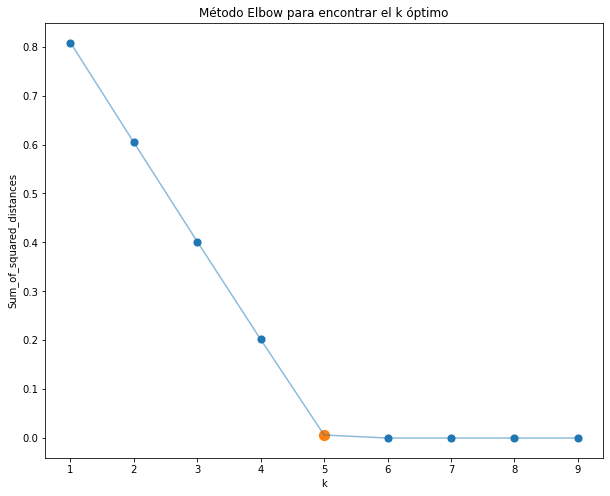

In [35]:
Sum_of_squared_distances = []

k_candidates = range(1, 10)
for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(k_eigenvectors)
    Sum_of_squared_distances.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=k_candidates, y = Sum_of_squared_distances, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[4]], y = [Sum_of_squared_distances[4]],  s=150, ax=ax)
sns.lineplot(x=k_candidates, y = Sum_of_squared_distances, alpha=0.5, ax=ax)
ax.set(title='Método Elbow para encontrar el k óptimo', ylabel='Sum_of_squared_distances', xlabel='k');

In [36]:
# Aplicar el algoritmo K-means a los autovectores
kmeans1 = KMeans(n_clusters=5)
kmeans1.fit(k_eigenvectors)
labels_1 = kmeans1.labels_

# Obtener los clusters
clusters = []
for i in range(5):
    cluster_i = np.where(labels_1 == i)[0]
    clusters.append(cluster_i)

In [37]:
for i, cluster in enumerate(clusters):
    num_observations = len(cluster)
    print(f"El cluster {i+1} tiene {num_observations} observaciones.")


El cluster 1 tiene 2883 observaciones.
El cluster 2 tiene 73 observaciones.
El cluster 3 tiene 56 observaciones.
El cluster 4 tiene 69 observaciones.
El cluster 5 tiene 9 observaciones.


# 2. Grafo Laplaciano Normalizado 

In [38]:
# Cálculo de la matriz Ls
D_sqrt_inv = np.diag(1 / np.sqrt(np.diag(D)))
Ls = np.eye(W.shape[0]) - D_sqrt_inv.dot(W).dot(D_sqrt_inv)

# Cálculo de la matriz Lrw
D_inv = np.linalg.inv(D)
Lrw = np.eye(D.shape[0]) - D_inv.dot(W)

print('Matriz Laplaciana normalizada:')
print ('---------------------------------------')
print("Matriz Ls:")
print(Ls)
print ('---------------------------------------')
print("Matriz Lrw:")
print(Lrw)

Matriz Laplaciana normalizada:
---------------------------------------
Matriz Ls:
[[0.85714286 0.         0.         ... 0.         0.         0.        ]
 [0.         0.75       0.         ... 0.         0.         0.        ]
 [0.         0.         0.75       ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.8        0.         0.        ]
 [0.         0.         0.         ... 0.         0.75       0.        ]
 [0.         0.         0.         ... 0.         0.         0.75      ]]
---------------------------------------
Matriz Lrw:
[[0.85714286 0.         0.         ... 0.         0.         0.        ]
 [0.         0.75       0.         ... 0.         0.         0.        ]
 [0.         0.         0.75       ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.8        0.         0.        ]
 [0.         0.         0.         ... 0.         0.75       0.        ]
 [0.         0.         0.         ... 0.         0.

## Segun Shi and Malik [2000]

In [39]:
# Elegimos solo los 3 autovalores mas pequeños
eigenvaluesLrw, eigenvectorsLrw = np.linalg.eig(Lrw)
indices = eigenvaluesLrw.argsort()[:5]
k_eigenvectorsLrw = eigenvectorsLrw[:, indices]
sorted_indices = np.argsort(eigenvaluesLrw)
sorted_eigenvalues = eigenvaluesLrw[sorted_indices]

print('Matriz de autovectores puestos como columnas:')
print ('---------------------------------------')
print(k_eigenvectorsLrw)

Matriz de autovectores puestos como columnas:
---------------------------------------
[[-0.00019537+0.j -0.01587935+0.j -0.01862321+0.j -0.00014   +0.j
  -0.00064777+0.j]
 [-0.00019537+0.j -0.01587935+0.j -0.01862321+0.j -0.00014   +0.j
  -0.00064777+0.j]
 [-0.00019537+0.j -0.01587935+0.j -0.01862321+0.j -0.00014   +0.j
  -0.00064777+0.j]
 ...
 [-0.00019537+0.j -0.01587935+0.j -0.01862321+0.j -0.00014   +0.j
  -0.00064777+0.j]
 [-0.00019537+0.j -0.01587935+0.j -0.01862321+0.j -0.00014   +0.j
  -0.00064777+0.j]
 [-0.00019537+0.j -0.01587935+0.j -0.01862321+0.j -0.00014   +0.j
  -0.00064777+0.j]]


In [40]:
# Obtener la parte real de los vectores
k_eigenvectorsLrw = np.real(k_eigenvectorsLrw)

print("Parte real de los vectores:")
print(k_eigenvectorsLrw)

Parte real de los vectores:
[[-0.00019537 -0.01587935 -0.01862321 -0.00014    -0.00064777]
 [-0.00019537 -0.01587935 -0.01862321 -0.00014    -0.00064777]
 [-0.00019537 -0.01587935 -0.01862321 -0.00014    -0.00064777]
 ...
 [-0.00019537 -0.01587935 -0.01862321 -0.00014    -0.00064777]
 [-0.00019537 -0.01587935 -0.01862321 -0.00014    -0.00064777]
 [-0.00019537 -0.01587935 -0.01862321 -0.00014    -0.00064777]]


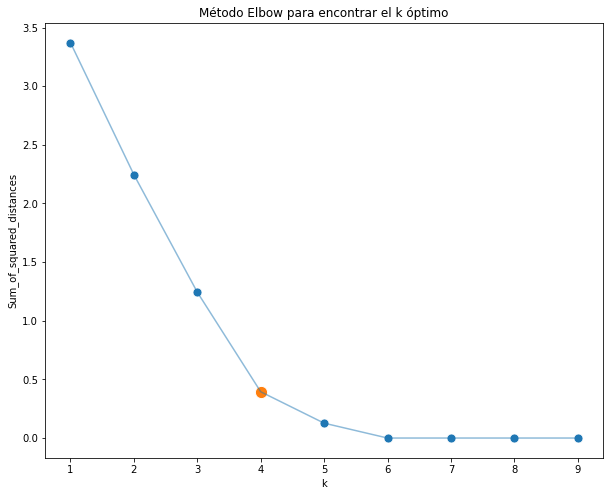

In [41]:
Sum_of_squared_distances = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(k_eigenvectorsLrw)
    Sum_of_squared_distances.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=k_candidates, y = Sum_of_squared_distances, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[3]], y = [Sum_of_squared_distances[3]],  s=150, ax=ax)
sns.lineplot(x=k_candidates, y = Sum_of_squared_distances, alpha=0.5, ax=ax)
ax.set(title='Método Elbow para encontrar el k óptimo', ylabel='Sum_of_squared_distances', xlabel='k');

In [42]:
# Aplicar el algoritmo K-means a los autovectores
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(k_eigenvectorsLrw)
labels_2 = kmeans2.labels_

# Obtener los clusters
clusters = []
for i in range(4):
    cluster_i = np.where(labels_2 == i)[0]
    clusters.append(cluster_i)

In [43]:
for i, cluster in enumerate(clusters):
    num_observations = len(cluster)
    print(f"El cluster {i+1} tiene {num_observations} observaciones.")


El cluster 1 tiene 2883 observaciones.
El cluster 2 tiene 129 observaciones.
El cluster 3 tiene 9 observaciones.
El cluster 4 tiene 69 observaciones.


## Segun Ng et al. [2002]

In [44]:
def normalize_rows(matrix):
    row_sums = np.sqrt(np.sum(matrix ** 2, axis=1, keepdims=True))
    return matrix / row_sums

In [45]:
# Calcular los k primeros autovectores generalizados
eigenvaluesLs, eigenvectorsLs = np.linalg.eig(Ls)
indices = eigenvaluesLs.argsort()[:5]
k_eigenvectorsLs = eigenvectorsLs[:, indices]
sorted_indices = np.argsort(eigenvaluesLs)
sorted_eigenvalues = eigenvaluesLs[sorted_indices]

print('Matriz de autovectores puestos como columnas:')
print ('---------------------------------------')
print(k_eigenvectorsLs)

Matriz de autovectores puestos como columnas:
---------------------------------------
[[-8.57599874e-08+0.j  2.15939248e-02+0.j -5.76819854e-04+0.j
  -4.53840131e-10+0.j  4.88666641e-05+0.j]
 [-6.48284572e-08+0.j  1.63234728e-02+0.j -4.36034824e-04+0.j
  -3.43071010e-10+0.j  3.69397259e-05+0.j]
 [-6.48284573e-08+0.j  1.63234728e-02+0.j -4.36034824e-04+0.j
  -3.43070892e-10+0.j  3.69397259e-05+0.j]
 ...
 [-7.24804180e-08+0.j  1.82501974e-02+0.j -4.87501754e-04+0.j
  -3.83564495e-10+0.j  4.12998690e-05+0.j]
 [-6.48284570e-08+0.j  1.63234728e-02+0.j -4.36034824e-04+0.j
  -3.43070886e-10+0.j  3.69397259e-05+0.j]
 [-6.48284563e-08+0.j  1.63234728e-02+0.j -4.36034824e-04+0.j
  -3.43070634e-10+0.j  3.69397259e-05+0.j]]


In [46]:
# Obtener la parte real de los vectores
k_eigenvectorsLs = np.real(k_eigenvectorsLs)

print("Parte real de los vectores:")
print(k_eigenvectorsLs)

Parte real de los vectores:
[[-8.57599874e-08  2.15939248e-02 -5.76819854e-04 -4.53840131e-10
   4.88666641e-05]
 [-6.48284572e-08  1.63234728e-02 -4.36034824e-04 -3.43071010e-10
   3.69397259e-05]
 [-6.48284573e-08  1.63234728e-02 -4.36034824e-04 -3.43070892e-10
   3.69397259e-05]
 ...
 [-7.24804180e-08  1.82501974e-02 -4.87501754e-04 -3.83564495e-10
   4.12998690e-05]
 [-6.48284570e-08  1.63234728e-02 -4.36034824e-04 -3.43070886e-10
   3.69397259e-05]
 [-6.48284563e-08  1.63234728e-02 -4.36034824e-04 -3.43070634e-10
   3.69397259e-05]]


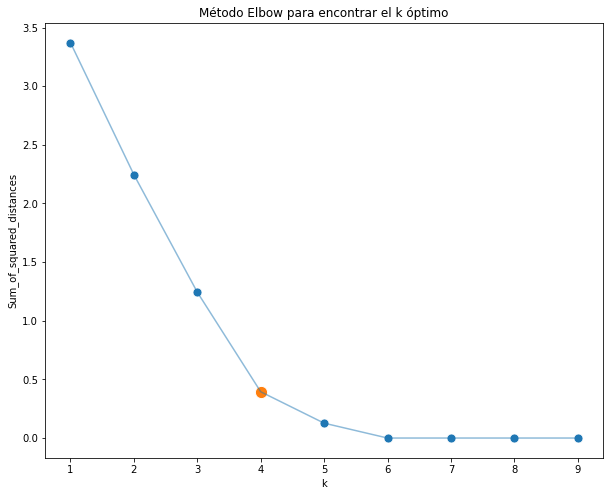

In [47]:
Sum_of_squared_distances = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(k_eigenvectorsLrw)
    Sum_of_squared_distances.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=k_candidates, y = Sum_of_squared_distances, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[3]], y = [Sum_of_squared_distances[3]],  s=150, ax=ax)
sns.lineplot(x=k_candidates, y = Sum_of_squared_distances, alpha=0.5, ax=ax)
ax.set(title='Método Elbow para encontrar el k óptimo', ylabel='Sum_of_squared_distances', xlabel='k');

In [48]:
# Construir matriz T normalizando las filas de U
T = normalize_rows(k_eigenvectorsLs)

# Ejecutar el algoritmo de k-means
kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(T)
# Obtener las etiquetas de los clusters
labels_3 = kmeans3.labels_
# Obtener los clusters
clusters = {}
for i, label in enumerate(labels_3):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(i)

In [49]:
#Imprimir el número de observaciones en cada cluster
for label, cluster in clusters.items():
    num_observaciones = len(cluster)
    print(f"Cluster {label+1}: {num_observaciones} observaciones")

Cluster 1: 2883 observaciones
Cluster 3: 69 observaciones
Cluster 2: 73 observaciones
Cluster 4: 65 observaciones


# Medidas de Bondad de ajuste

# Validacion interna 

In [50]:
from sklearn import metrics

# Calcular el Silhouette Score
silhouette_score_1 = metrics.silhouette_score(df_encoded, labels_1)
silhouette_score_2 = metrics.silhouette_score(df_encoded, labels_2)
silhouette_score_3 = metrics.silhouette_score(df_encoded, labels_3)

# Calcular el Calinski-Harabasz Index
calinski_score_1 = metrics.calinski_harabasz_score(df_encoded, labels_1)
calinski_score_2 = metrics.calinski_harabasz_score(df_encoded, labels_2)
calinski_score_3 = metrics.calinski_harabasz_score(df_encoded, labels_3)

# Calcular el Davies-Bouldin Index
davies_bouldin_score_1 = metrics.davies_bouldin_score(df_encoded, labels_1)
davies_bouldin_score_2 = metrics.davies_bouldin_score(df_encoded, labels_2)
davies_bouldin_score_3 = metrics.davies_bouldin_score(df_encoded, labels_3)

# Imprimir los resultados
print("Lagrangiano no normalizado")
print("Silhouette Score:", silhouette_score_1)
print("Calinski-Harabasz Index:", calinski_score_1)
print("Davies-Bouldin Index:", davies_bouldin_score_1)
print('-------------------------------------')
print("Lagrangiano normalizado Shi and Malik")
print("Silhouette Score:", silhouette_score_2)
print("Calinski-Harabasz Index:", calinski_score_2)
print("Davies-Bouldin Index:", davies_bouldin_score_2)
print('-------------------------------------')
print("Lagrangiano normalizado Ng et al.")
print("Silhouette Score:", silhouette_score_3)
print("Calinski-Harabasz Index:", calinski_score_3)
print("Davies-Bouldin Index:", davies_bouldin_score_3)

Lagrangiano no normalizado
Silhouette Score: 0.7448176462617266
Calinski-Harabasz Index: 1586.4034799019632
Davies-Bouldin Index: 0.6216754376235739
-------------------------------------
Lagrangiano normalizado Shi and Malik
Silhouette Score: 0.7524267076797644
Calinski-Harabasz Index: 1153.6931739212296
Davies-Bouldin Index: 0.9025063273346594
-------------------------------------
Lagrangiano normalizado Ng et al.
Silhouette Score: 0.7629034851895394
Calinski-Harabasz Index: 1878.0957834808255
Davies-Bouldin Index: 0.5661613244321928
